In [1]:
import arserate as arse
import seaborn as sns
import pandas as pd
%matplotlib inline

## Read in data

In [2]:
db_path = 'ratings.db'

In [3]:
df = arse.ready_df(db_path)
df.head()

,playerID,gameID,date,season,competition,home_away,opponent,arsegoals,oppgoals,wld,...,userrating,name,number,positions,natl_team,birthdate,academy_grad,nickname,rare_positions,url
0,1,1,2014-01-04,2013-14,FA Cup,home,Sp*rs,2,0,win,...,7.0,Lukasz Fabianski,21,GK,Poland,1985-04-18,False,,,http://news.arseblog.com/2014/01/arsenal-2-0-s...
1,1,4,2014-01-24,2013-14,FA Cup,home,Coventry City,4,0,win,...,7.5,Lukasz Fabianski,21,GK,Poland,1985-04-18,False,,,http://news.arseblog.com/2014/01/arsenal-4-0-c...
2,1,8,2014-02-16,2013-14,FA Cup,home,Liverpool,2,1,win,...,9.5,Lukasz Fabianski,21,GK,Poland,1985-04-18,False,,,http://news.arseblog.com/2014/02/arsenal-2-1-l...
3,1,9,2014-02-19,2013-14,Champions League,home,Bayern Munich,0,2,loss,...,7.0,Lukasz Fabianski,21,GK,Poland,1985-04-18,False,,,http://news.arseblog.com/2014/02/arsenal-0-2-b...
4,1,12,2014-03-08,2013-14,FA Cup,home,Everton,4,1,win,...,7.0,Lukasz Fabianski,21,GK,Poland,1985-04-18,False,,,http://news.arseblog.com/2014/03/arsenal-4-1-e...


## Define functions for dataframe and chart creation

In [4]:
def season_apps_min(df, season, min_apps):
    """Limit dataset to players who made some minimum number of appearances in a given season
    
    Parameters
    ----------
    df : pandas DataFrame
        DataFrame with each row corresponding to a player appearance
    season : {'all', 2013-14', '2014-15', '2015-16', '2016-17', '2017-18'}
        Season of interest or 'all' seasons
    
    Returns
    -------
    apps_df : pandas DataFrame
        A dataframe of summary data by player
    """
    if season == 'all':
        df_season = df
    else:
        df_season = df[df['season']==season]
    
    season_summary = arse.quick_summary(df_season, by='player')
    apps_df = season_summary.loc[season_summary['appearances']['size']>=min_apps]
    return apps_df

In [5]:
def top11_chart(players_df, title=''):
    """Create horizontal bar chart of top 11 players' averages
    
    Parameters
    ----------
    players_df : pandas DataFrame
        A dataframe in the same style as the output from arserate.quick_summary(df, by='player')
    
    title : str, optional
        A title for the chart
        
    Returns
    -------
    plot : seaborn plot
    """
    apps_avg = players_df[('userrating','mean')].mean()
    print(apps_avg)
    top11_df = players_df.sort_values([('userrating','mean')], ascending=False).iloc[0:11]
    
    sns.set_style('whitegrid')
    sns.set_context("talk") # 'paper', 'notebook', 'talk', 'poster'
    plot = sns.barplot(x=('userrating','mean'), y=top11_df.index, data=top11_df, color='#EC0C1C')

    # clean up the plot
    plot.axes.yaxis.set_tick_params(width=0)
    plot.set_xlabel('')
    plot.set_ylabel('Player (appearances)')
    plot.set_xticks(range(0,11))
    
    ylab = top11_df.index.map(str)+" ("+top11_df['appearances', 'size'].map(str)+")"
    plot.set_yticklabels(ylab)
    plot.set_xlim(left=0.0, right=10.0)
    plot.set_title(title)

    # add data labels to the bars
    for p in plot.patches:
        width = p.get_width()
        plot.text(x=p.get_width()+0.25,
                  y=p.get_y()+p.get_height()/2,
                  s='{0:.2f}'.format(width),
                  va='center',
                  fontsize=14
                 )
    
    # add vertical line at mean of all players after accounting for the appearance minimum
    plot.axvline(x=apps_avg, ls='dashed', c='lightgray', lw=2)
    sns.despine(left=True, bottom=True)
    return plot

## MVP over all seasons (min. 30 appearances)

In [6]:
summary_df = arse.quick_summary(df, by='player')
apps_df = summary_df.loc[summary_df['appearances']['size']>=30]
top_df = apps_df.sort_values([('userrating','mean')], ascending=False)

top_df

appearances userrating                    \
                               size       mean median  min   max   
name                                                               
Petr Cech                       106   6.932692   7.50  2.0   9.5   
Mesut Özil                      163   6.746914   7.00  1.0   9.5   
Laurent Koscielny               169   6.630952   7.50  1.5   9.5   
Tomas Rosicky                    44   6.613636   7.00  3.5   9.0   
Nacho Monreal                   167   6.611446   7.00  1.0   9.0   
Alexis Sanchez                  160   6.572785   6.50  2.0   9.5   
Santi Cazorla                   107   6.495283   6.75  1.5  10.0   
Mohamed Elneny                   62   6.467213   6.50  3.0   8.5   
Rob Holding                      36   6.457143   7.00  2.5   9.0   
Hector Bellerin                 146   6.406250   7.00  1.5   9.0   
Per Mertesacker                 117   6.376068   7.00  2.0   9.5   
David Ospina                     61   6.368852   7.00  1.5   9.0   
Jack Wilshere                    66   6.348485   6.50  2.5   9.0   
Francis Coquelin                111   6.261468   6.50  1.5   9.5   
Wojciech Szczesny                45   6.233333   6.50  1.5   9.0   
Kieran Gibbs                     96   6.200000   6.50  1.5   8.5   
Sead Kolasinac                   30   6.200000   6.50  3.0   9.0   
Gabriel Paulista                 61   6.131148   6.50  2.0   9.0   
Calum Chambers                   74   6.095890   6.50  2.5   8.5   
Joel Campbell                    39   6.089744   6.00  2.0   9.0   
Aaron Ramsey                    137   6.051852   6.50  1.5   9.5   
Olivier Giroud                  169   6.026786   6.50  1.0   9.5   
Granit Xhaka                     79   6.006494   6.00  1.5   9.0   
Lukas Podolski                   33   6.000000   7.00  1.5   9.0   
Alex Oxlade-Chamberlain         132   5.996154   6.50  1.0   9.0   
Mikel Arteta                     46   5.967391   6.50  1.0   9.5   
Shkodran Mustafi                 62   5.909836   6.50  1.5   9.5   
Mathieu Flamini                  72   5.784722   6.00  2.5   9.0   
Danny Welbeck                    95   5.773684   6.00  2.0   9.5   
Alex Iwobi                       82   5.617284   6.00  2.0   9.0   
Theo Walcott                    106   5.197115   5.00  1.5   9.5   

                        arseblograting                    
                                  mean median  min   max  
name                                                      
Petr Cech                     6.876635    7.0  3.0  10.0  
Mesut Özil                    6.671094    7.0  0.0  10.0  
Laurent Koscielny             6.606145    7.0  1.0  10.0  
Tomas Rosicky                 6.414634    7.0  2.0   9.0  
Nacho Monreal                 6.638988    7.0  1.0  10.0  
Alexis Sanchez                6.630573    6.5  2.0  10.0  
Santi Cazorla                 6.621495    6.5  1.0  11.0  
Mohamed Elneny                6.491379    6.5  0.0  10.0  
Rob Holding                   6.705882    7.0  3.0  10.0  
Hector Bellerin               6.569500    7.0  2.0  10.0  
Per Mertesacker               6.581897    7.0  2.0  10.0  
David Ospina                  6.442623    7.0  2.0  10.0  
Jack Wilshere                 6.484194    6.5  3.0  10.0  
Francis Coquelin              6.301020    6.5  0.0  10.0  
Wojciech Szczesny             6.311111    6.0  1.0  10.0  
Kieran Gibbs                  6.122222    6.0  1.0  10.0  
Sead Kolasinac                6.180357    6.0  0.0   9.0  
Gabriel Paulista              6.405172    6.5  3.0  10.0  
Calum Chambers                6.265625    6.0  3.0   8.5  
Joel Campbell                 6.338710    6.0  4.0   9.0  
Aaron Ramsey                  6.426031    6.5  1.0  10.0  
Olivier Giroud                6.317308    6.0  0.5  10.0  
Granit Xhaka                  6.423506    6.5  2.0  10.0  
Lukas Podolski                5.935484    6.0  1.0   9.0  
Alex Oxlade-Chamberlain       6.104167    6.0  0.0  10.0  
Mikel Arteta                  6.068182    6.5  0.0  10.0  


6.211955507152806


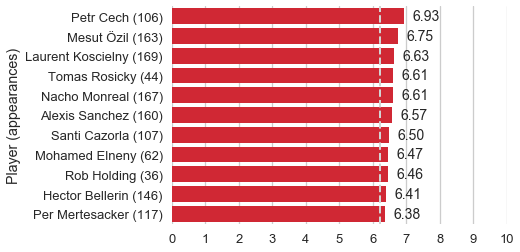

In [7]:
top11_chart(top_df).get_figure().savefig('../img/mvps/mvp_all_seasons.png')

## By season

### 2013-14 MVP (second half of season)

6.555705502071157


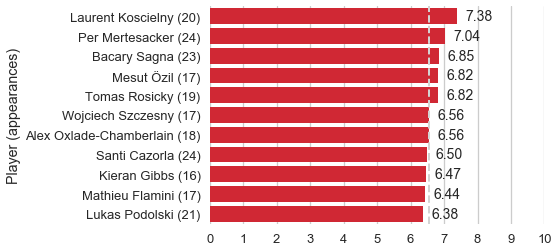

In [8]:
df13_14 = season_apps_min(df, season='2013-14', min_apps=15)
top11_chart(df13_14).get_figure().savefig('../img/mvps/mvp_13_14.png')

#### Average rating in non-FA Cup matches

In [9]:
df13_14_noFA = df[(df['season']=='2013-14')& (df['competition']!='FA Cup')]
noFA13_14_summary = arse.quick_summary(df13_14_noFA, by='aggregate')
noFA13_14_summary

userrating                           arseblograting                        \
        size     mean median  min  max           size      mean median  min   
0      263.0  6.34981    7.0  1.0  9.5          263.0  6.113281    7.0  0.0   

         
    max  
0  10.0

### 2014-15 MVP

6.42633592965308


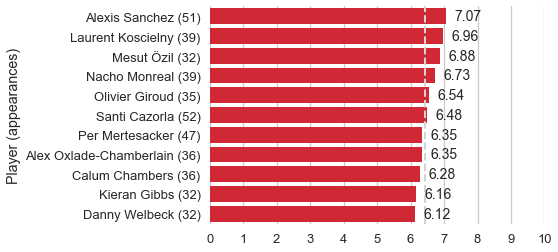

In [10]:
df14_15 = season_apps_min(df, season='2014-15', min_apps=30)
top11_chart(df14_15).get_figure().savefig('../img/mvps/mvp_14_15.png')

#### Average rating in non-FA Cup matches

In [11]:
df14_15_noFA = df[(df['season']=='2014-15')& (df['competition']!='FA Cup')]
noFA14_15_summary = arse.quick_summary(df14_15_noFA, by='aggregate')
noFA14_15_summary

userrating                            arseblograting                        \
        size     mean median  min   max           size      mean median  min   
0      673.0  6.30312    6.5  1.5  10.0          673.0  6.431221    6.5  2.0   

         
    max  
0  11.0

### 2015-16 MVP

6.311483111065718


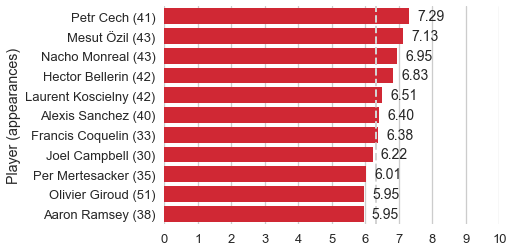

In [12]:
df15_16 = season_apps_min(df, season='2015-16', min_apps=30)
top11_chart(df15_16).get_figure().savefig('../img/mvps/mvp_15_16.png')

### 2016-17 MVP

6.198953705803995


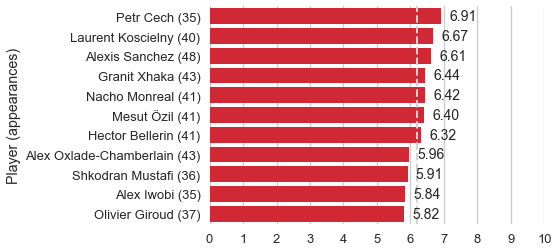

In [13]:
df16_17 = season_apps_min(df, season='2016-17', min_apps=30)
top11_chart(df16_17).get_figure().savefig('../img/mvps/mvp_16_17.png')

### 2017-18 MVP (so far)

5.968142988116077


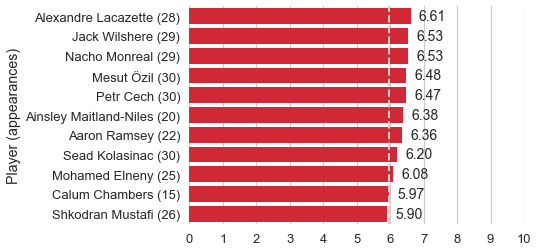

In [14]:
df17_18 = season_apps_min(df, season='2017-18', min_apps=15)
top11_chart(df17_18).get_figure().savefig('../img/mvps/mvp_17_18.png')